In [2]:
from scipy.io import arff
import pandas as pd
df = pd.read_csv('Autism-Adult-Data.csv')

df=df.drop(['age_desc','used_app_before','result','ethnicity','contry_of_res','relation'], axis=1)#retirando colunas com dados majoritariamente de uma classe
df = df[df.age != '?']#retirando os dois dados com idade faltando
df = df[df.age != '383']#retirando o outlier cuja idade é de 383 anos
df['age']=pd.to_numeric(df['age'])#transformando a coluna idade em valor numerico

#Converter as classificações binarias em inteiros
df['gender']=df['gender'].replace({'f' : 1, 'm' : 0})
df['jundice']=df['jundice'].replace({'yes' : 1, 'no' : 0})
df['austim']=df['austim'].replace({'yes' : 1, 'no' : 0})
df['Class/ASD']=df['Class/ASD'].replace({'YES' : 1, 'NO' : 0})

#Normalizando a idade
df=(df-df.min())/(df.max()-df.min())

df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,Class/ASD
0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.191489,1.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.148936,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.212766,0.0,1.0,1.0,1.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.382979,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.489362,1.0,0.0,0.0,0.0


In [3]:
#Heatmap de correlação
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

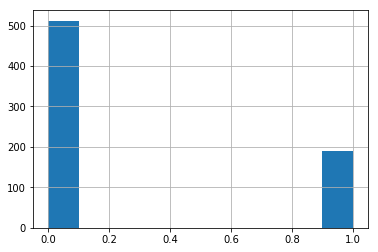

In [4]:
df['Class/ASD'].hist()

In [5]:
import numpy as np
from sklearn import svm
X = df.drop('Class/ASD', axis=1).values  
y = df['Class/ASD'].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) # dividindo entre teste e treinamento
from sklearn.svm import SVC 
svclassifier = SVC(kernel='linear')#setando a função do classificador
svclassifier.fit(X_train, y_train)  #treinando



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
y_pred = svclassifier.predict(X_test)#testando
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))
svclassifier.score(X_test, y_test)

[[97  0]
 [ 0 44]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        97
        1.0       1.00      1.00      1.00        44

avg / total       1.00      1.00      1.00       141



1.0

In [8]:
#Cross-valdiation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier, X , y, cv=5)
scores

array([1., 1., 1., 1., 1.])

In [9]:
#Kfold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix  
kf = KFold(n_splits=100)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svclassifier = SVC(kernel='linear')
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)#testando
    s=svclassifier.score(X_test, y_test)
    if(s<1):
        print(s)
print(s)

1.0


In [26]:
X = df_balanceada.drop('Class/ASD', axis=1).values  
y = df_balanceada['Class/ASD'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) # dividindo entre teste e treinamento
from sklearn.svm import SVC 
svclassifier = SVC(kernel='linear')#setando a função do classificador
svclassifier.fit(X_train, y_train)  #treinando
y_pred = svclassifier.predict(X_test)#testando
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))
svclassifier.score(X_test, y_test)

[[ 92   0]
 [  0 113]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        92
        1.0       1.00      1.00      1.00       113

avg / total       1.00      1.00      1.00       205



1.0

In [81]:
#Metodo 2 Random Forest
import numpy as np
X = df.drop('Class/ASD', axis=1).values  
y = df['Class/ASD'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) # dividindo entre teste e treinamento
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000,)
rf.fit(X_train, y_train)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [71]:
y_pred = rf.predict(X_test)#testando
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test.round(),y_pred.round()))
print(classification_report(y_test.round(),y_pred.round()))
rf.score(X_test, y_test)

[[106   4]
 [  2  29]]
             precision    recall  f1-score   support

        0.0       0.98      0.96      0.97       110
        1.0       0.88      0.94      0.91        31

avg / total       0.96      0.96      0.96       141



0.7411554252199413

In [88]:
#Cross-valdiation
rf = RandomForestRegressor(n_estimators = 1000)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X , y, cv=10)
scores.mean(),scores.max(),scores.std()

(0.7607791976843703, 0.8639900647548565, 0.08645712247881576)

In [91]:
rf = RandomForestRegressor(n_estimators = 100)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X , y, cv=100)
scores.mean(),scores.max(),scores.std()

(0.5994989166666665, 1.0, 0.38391338030229155)

In [3]:
#Balanceamento com upsample do positivo para 512
df_pos = df[df['Class/ASD'] ==1]
df_neg = df[df['Class/ASD'] ==0]
from sklearn.utils import resample
df_pos_upsampled = resample(df_pos, 
                            replace=True,     # sample with replacement
                            n_samples=512,    # to match majority class
                            random_state=123) # reproducible results

df_balanceada = pd.concat([df_neg, df_pos_upsampled])
df_balanceada['Class/ASD'].value_counts()

1.0    512
0.0    512
Name: Class/ASD, dtype: int64

In [25]:
X = df_balanceada.drop('Class/ASD', axis=1).values  
y = df_balanceada['Class/ASD'].values
#X = df.drop('Class/ASD', axis=1).values  
#y = df['Class/ASD'].values

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000,random_state = 123)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state =123) # dividindo entre teste e treinamento

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test.round(),y_pred.round()))
print(classification_report(y_test.round(),y_pred.round()))
rf.score(X_test, y_test)

[[108   5]
 [  0  92]]
             precision    recall  f1-score   support

        0.0       1.00      0.96      0.98       113
        1.0       0.95      1.00      0.97        92

avg / total       0.98      0.98      0.98       205



0.9151208897652944